# Rayyan Minhaj (20K-0143 | BSC-8B)


---


### Probabilistic Collaborative Filtering
Download the Python notebook which contains sample data and starter code. Your
task is to implement the functions to find the likelihood, prior and posterior for item-based Naïve Bayes
Collaborative Filtering.
Note: You are allowed to import and use basic libraries such as pandas, numpy and scikit in your functions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
matrix = pd.DataFrame({'Item 1': [5, 4, 5, 1], 'Item 2': [3, 2, 'NaN', 5], 'Item 3': [3, 3, 4, 4], 'Item 4': ['NaN', 3, 2, 3]}, index=['User 1', 'User 2', 'User 3', 'User 4'])

In [3]:
matrix.head()

,Item 1,Item 2,Item 3,Item 4
User 1,5,3,3,NaN
User 2,4,2,3,3
User 3,5,NaN,4,2
User 4,1,5,4,3


In [4]:
n_ratings = 5
active_user = 1 # for this assignment
active_item = 4 # for this assignment

<h3 style="color:red">Do not change anything in the data/code given above</h3>

<h1> Task 1 </h1>

In [5]:
_alpha=0.01
_beta=_alpha*5


You need to implement the following functions:

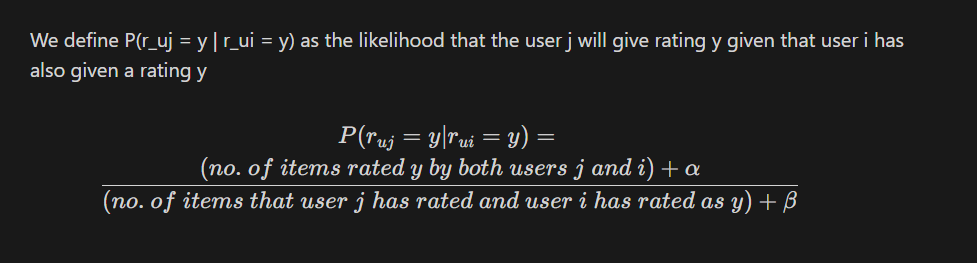

In [44]:
from functools import reduce

#this is to multiply list elements, not for any RS functions

In [55]:
def likelihood(matrix, rating):
    #matrix will be fixed and so will the rating because in item-based naive-bayes
    #we keep ratings same for ex. P(Ruj=1|Rui=1) and so on

    #num_count=0
    #denom_count=0
    #lik=1
    #numerator=num of items rated as 'rating' by both
    #denominator=num of items rated anything by user j but 'rating' by user i (Active user=1)

    lik=[]
    for i in range(1,5): #iterating through non active users
       if i != active_user:
        num_count=0
        denom_count=0

        for j in range(1,5): #for each user we will iterate through all items 1-3
          if j != active_item:
            if matrix[f'Item {j}']['User 1']==matrix[f'Item {j}'][f'User {i}']==rating:
              num_count+=1

            if matrix[f'Item {j}']['User 1']==rating and matrix[f'Item {j}'][f'User {i}']!='NaN':
              denom_count+=1


        #print(num_count)
        #print(denom_count)
        lik.append((num_count+_alpha)/(denom_count+_beta))
        #print(lik)

    total=0
    total = reduce(lambda a, b: a*b, lik)

    #we now have a list that we need to multiply its elemts with (Reduce)
    #print(total)
    return total

In [61]:
#you can check individual here P(Ruj = 5 | Pui = 5)
#or any other prob of ratings between 1-5

print(likelihood(matrix,5))

8.724759745167906e-05


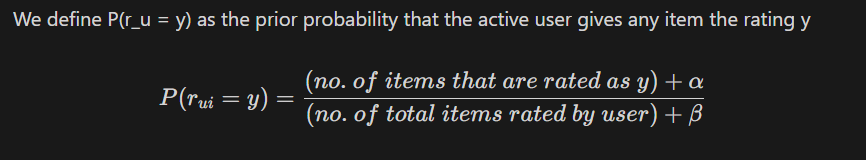

In [81]:
def prior(matrix, rating):

    #numerator=num of items rated as 'rating'
    #denominator=num of total items rated anything by active user
    count_num=0
    count_denom=0

    #traversing items
    for i in range(1,5):
      if matrix[f'Item {i}'][f'User {active_user}'] == rating:
        count_num+=1

      if matrix[f'Item {i}'][f'User {active_user}'] != 'NaN':
        count_denom+=1


    prior_total=((count_num+_alpha)/(count_denom+_beta))

    #print(prior_total)
    return prior_total

In [82]:
#you can check individual here P(Ruj = 5)
#or any other prob of ratings between 1-5

print(prior(matrix,5))

0.3311475409836066


In [83]:
def posterior(matrix, rating):
    a=likelihood(matrix,rating)
    b=prior(matrix,rating)

    pos_total=a*b
    return pos_total

In [87]:
#you can check individual here P(Ruj = 5) * P(Ruj = 5 | Pui = 5)
#or any other prob of ratings between 1-5

print(posterior(matrix,5))

2.88918273528511e-05


<h3 style="color:red">Do not change anything beyond this point</h3>

In [90]:
posteriors = []

# calculating posterior for each possible rating i.e. 1, 2, 3, 4, 5
for i in range(n_ratings):
    posteriors.append(posterior(matrix, i+1))

print(posteriors)
# selecting rating that gives us the max posterior
rating_to_be_given = posteriors.index(max(posteriors)) + 1

# printing final answer and verify
print(f'\nRating for User {active_user} and Item {active_item} is: {rating_to_be_given}')

[2.622950819672131e-05, 2.622950819672131e-05, 1.5084140559803956e-05, 2.622950819672131e-05, 2.88918273528511e-05]

Rating for User 1 and Item 4 is: 5
